In [61]:
import os
import pandas
import numpy
import math
import matplotlib.pyplot as plt

##### **Numpy Arrays**

<i>Análise inicial do array<i>

In [62]:
data = numpy.random.rand(1000,2)
print(f'Dimensões do array: {data.shape}')
print(f'Número de dados: {numpy.size(data)}')
print(data[0:5])

Dimensões do array: (1000, 2)
Número de dados: 2000
[[0.57702703 0.21567412]
 [0.69926222 0.62811123]
 [0.64343797 0.64552373]
 [0.51946017 0.27481636]
 [0.36535273 0.30898997]]


<i>Implementação de Monte Carlo para gerar números aleatórios em um intervalo específico</i>

In [63]:
dataMax = 1000 #Valor máximo
dataMin = 10 #Valor mínimo
data = (dataMax - dataMin)*data + dataMin
print(data[0:10])

[[581.25676144 223.5173785 ]
 [702.26959689 631.83011887]
 [647.00359213 649.06849473]
 [524.26556668 282.06819575]
 [371.69920328 315.90006956]
 [828.9811273  814.66322159]
 [ 85.65666792 359.98761005]
 [482.67596482 176.10207006]
 [448.6823826  591.38282071]
 [555.53949467 916.92433286]]


<i>Visualização dos dados</i>

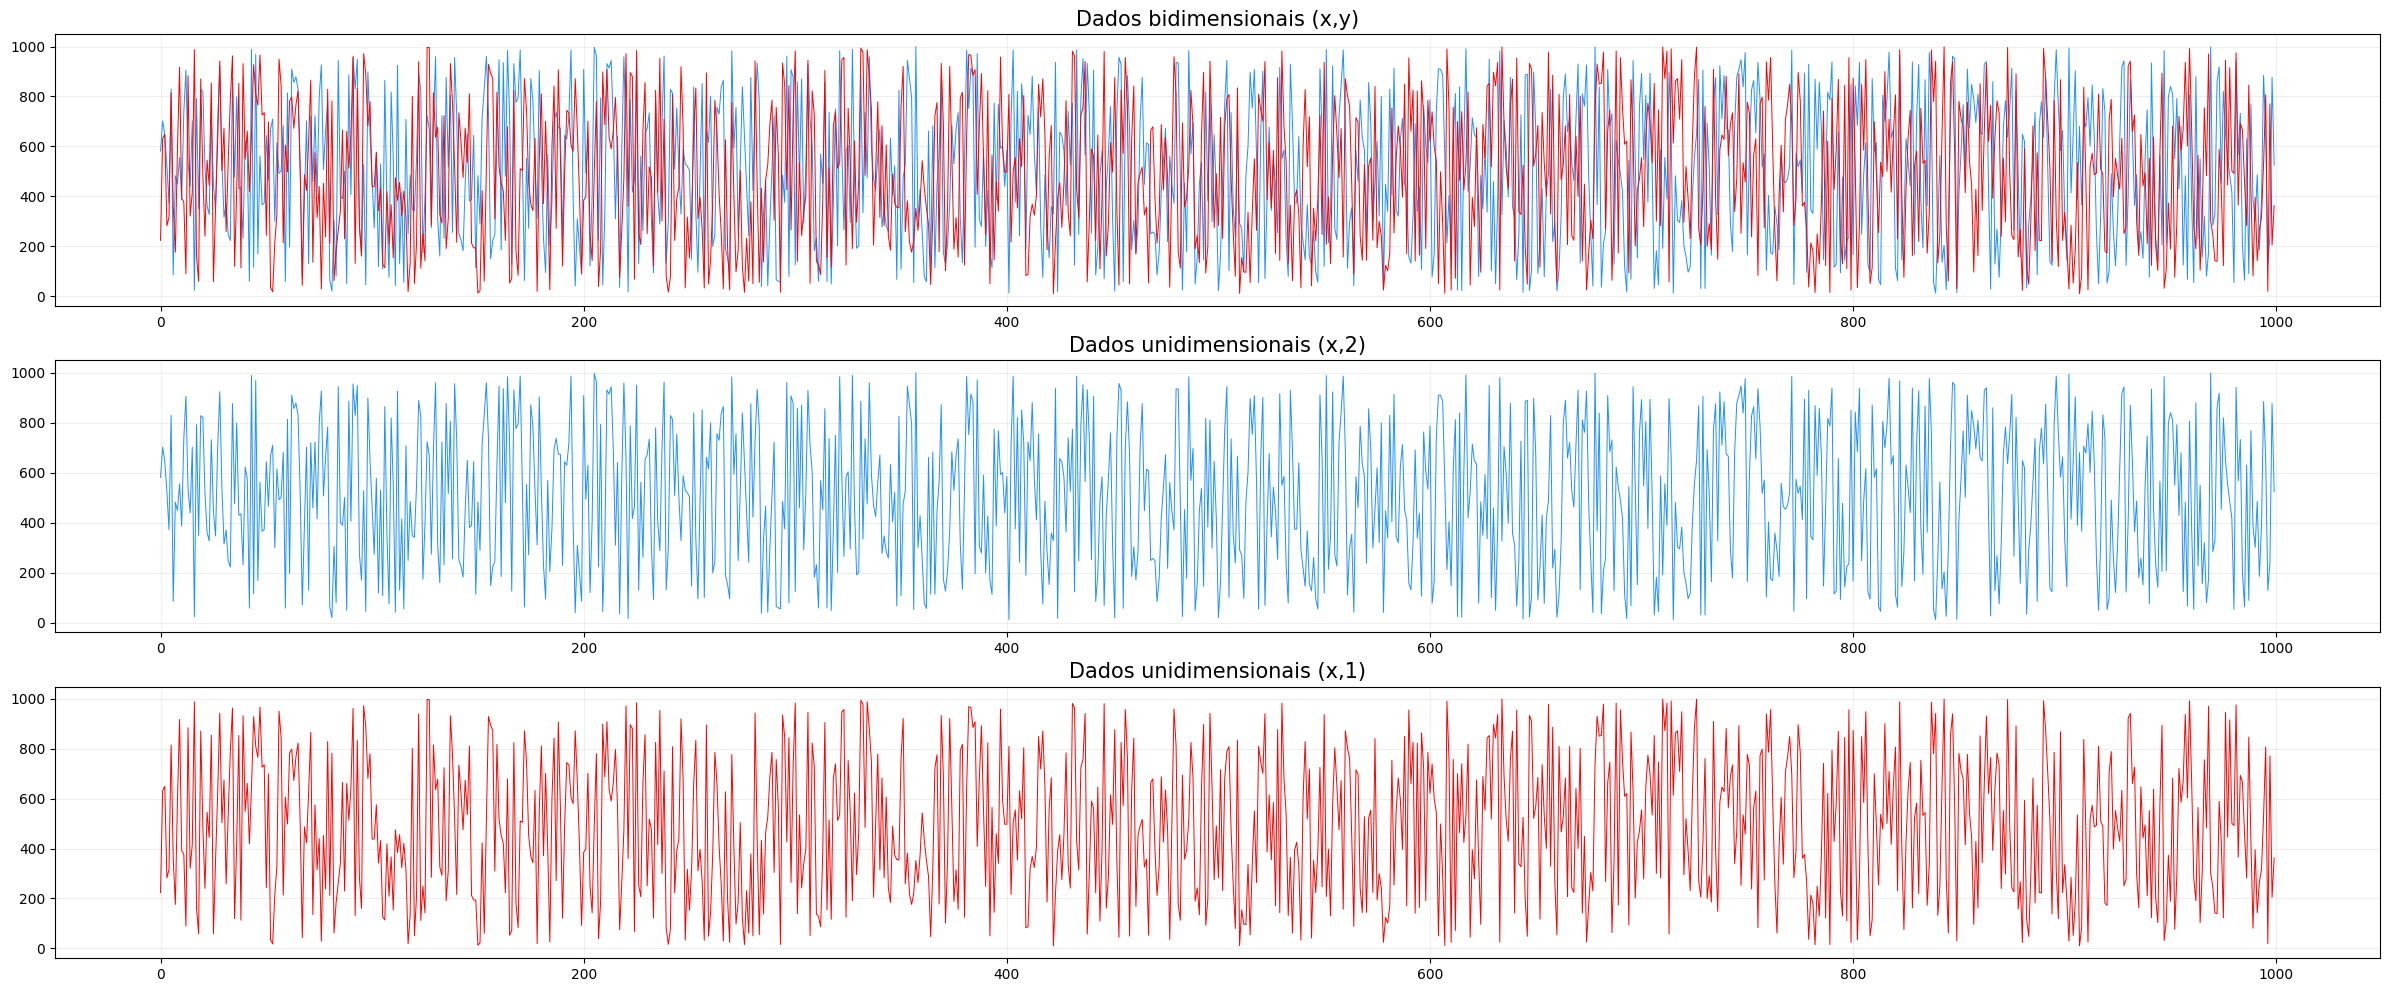

In [64]:
fig, ax = plt.subplots(3,figsize=(30,12))
cor = ['dodgerblue','red']
for i in range(data.shape[1]):
    ax[0].plot(data[:,i], linewidth=0.7, color=f'{cor[i]}')
ax[1].plot(data[:,0], linewidth=0.7, color='dodgerblue')
ax[2].plot(data[:,1], linewidth=0.7, color='red')

ax[0].set_title('Dados bidimensionais (x,y)', fontsize=15)
ax[1].set_title('Dados unidimensionais (x,2)', fontsize=15)
ax[2].set_title('Dados unidimensionais (x,1)', fontsize=15)
ax[0].grid(alpha=0.2)
ax[1].grid(alpha=0.2)
ax[2].grid(alpha=0.2)
plt.show()

<i>Arrays bidimensionais</i>

In [65]:
data2d = numpy.sin(numpy.random.rand(1000,1000))
print(data2d)

[[0.1944505  0.10161551 0.31166095 ... 0.6776965  0.60505655 0.25946278]
 [0.33350849 0.70886647 0.25076088 ... 0.26265179 0.55283192 0.53868491]
 [0.55348619 0.13549725 0.12781537 ... 0.41393371 0.21689275 0.35642355]
 ...
 [0.6564769  0.41349343 0.40688207 ... 0.82991423 0.19405087 0.65122273]
 [0.31345796 0.18973742 0.75942314 ... 0.07806202 0.79759233 0.56108622]
 [0.42136475 0.6764053  0.38971334 ... 0.02060238 0.5879079  0.72021892]]


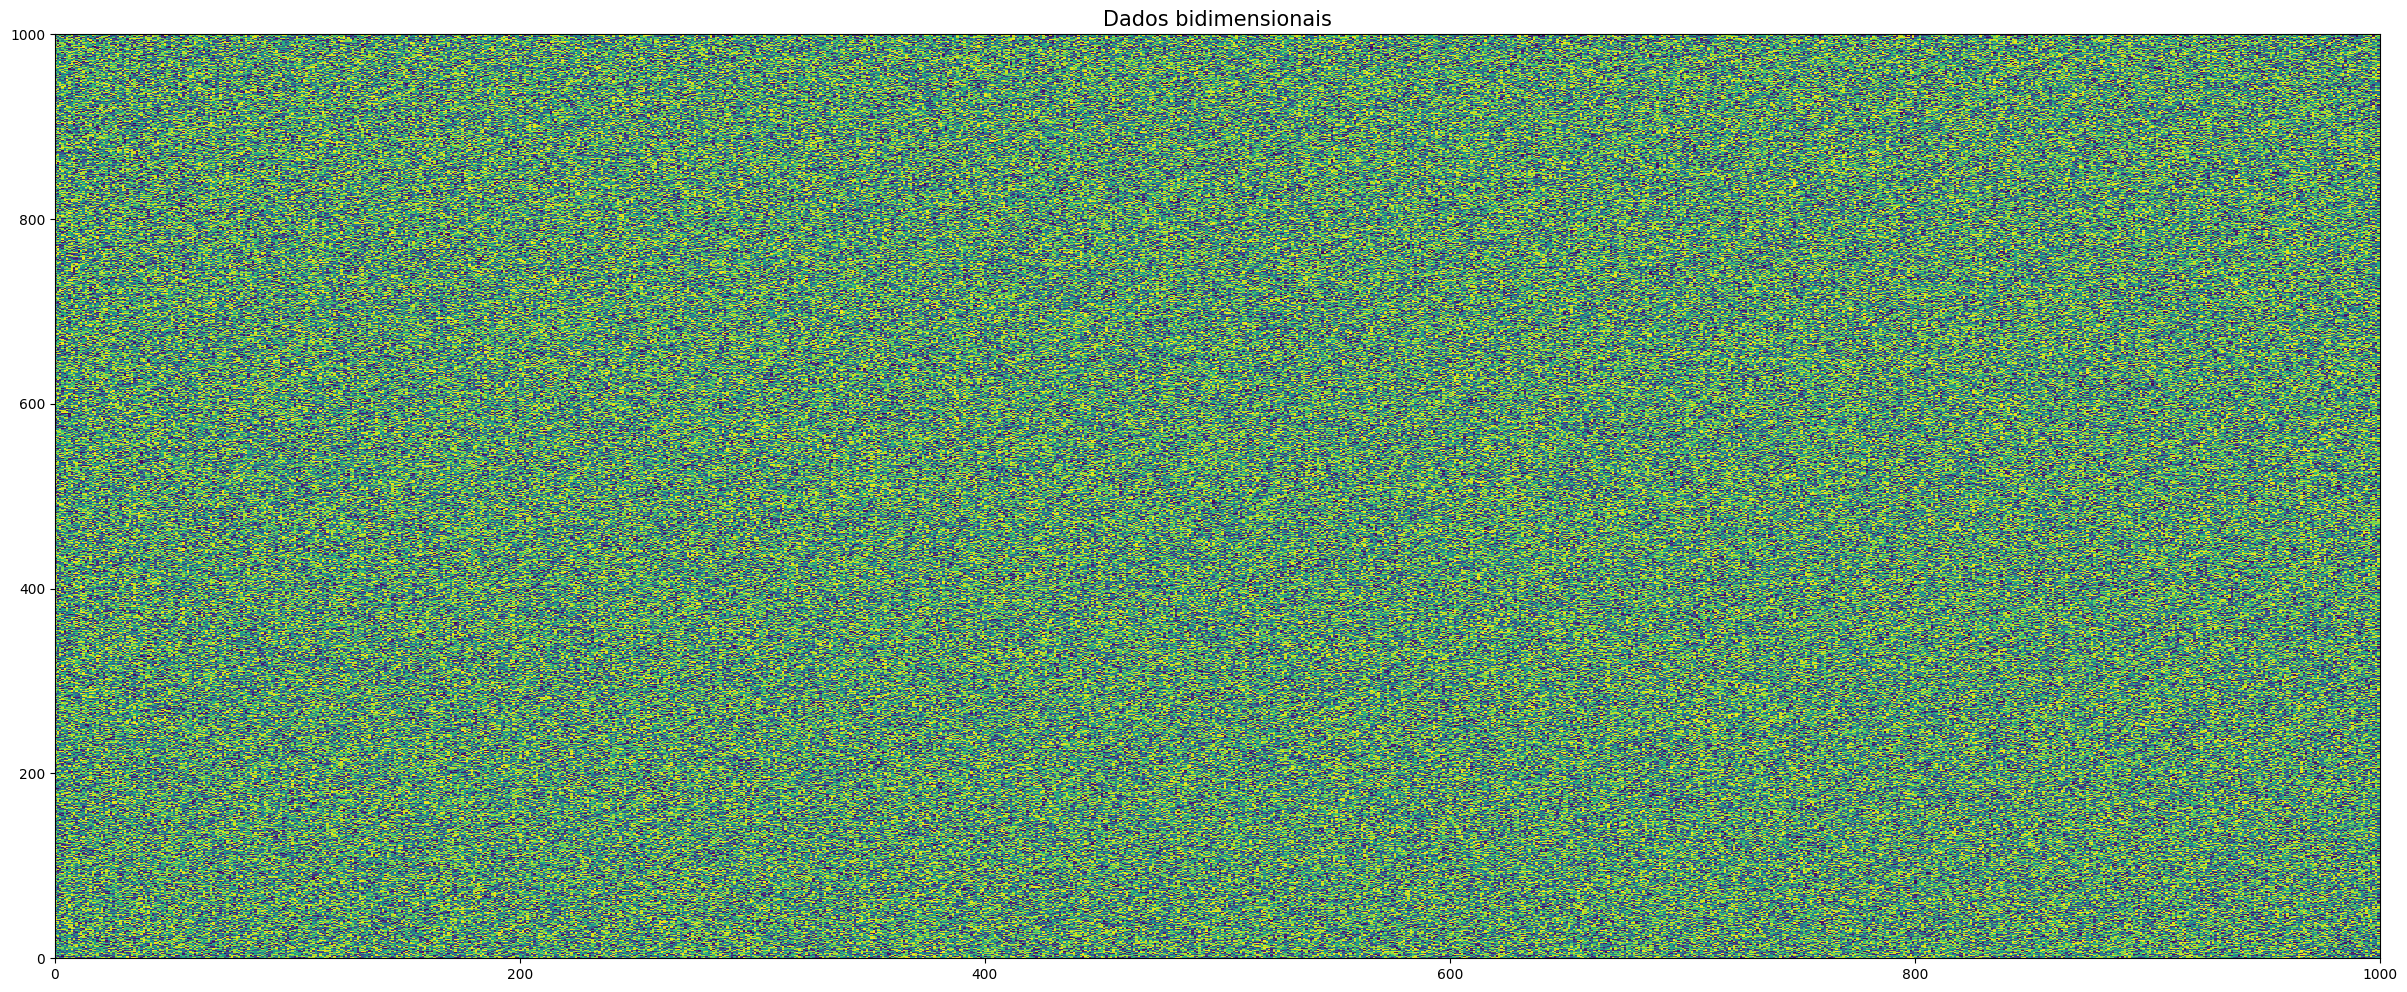

In [66]:
fig2, ax2 = plt.subplots(figsize=(30,12))
ax2.set_title('Dados bidimensionais', fontsize=15)
ax2.pcolor(data2d)

<i>Séries temporais</i>

In [67]:
dtime = numpy.arange(numpy.datetime64('2022-01-01'),numpy.datetime64('2023-01-01'),numpy.timedelta64(1,'h')) #Discretização temporal
print(f'Dimensões do array: {dtime.shape}')
print(f'Número de dados: {numpy.size(dtime)}')
print(f'Tipagem dos dados: {type(dtime)}')
print(dtime[0:4])

Dimensões do array: (8760,)
Número de dados: 8760
Tipagem dos dados: <class 'numpy.ndarray'>
['2022-01-01T00' '2022-01-01T01' '2022-01-01T02' '2022-01-01T03']


##### **Dataframe Pandas**

<i>Criação do dataframe através da série temporal</i>

In [68]:
dataframe = pandas.DataFrame()
dataframe['Datetime'] = dtime
dataframe['Values'] = numpy.random.rand(dataframe.shape[0])
dataframe = dataframe.set_index(dataframe['Datetime'])
dataframe = dataframe[['Values']]
dataframe['Ano'] = dataframe.index.year
dataframe['Mês'] = dataframe.index.month
dataframe['Dia'] = dataframe.index.day
dataframe.tail(20)

Values   Ano  Mês  Dia
Datetime                                     
2022-12-31 04:00:00  0.795870  2022   12   31
2022-12-31 05:00:00  0.392025  2022   12   31
2022-12-31 06:00:00  0.022247  2022   12   31
2022-12-31 07:00:00  0.187802  2022   12   31
2022-12-31 08:00:00  0.064055  2022   12   31
2022-12-31 09:00:00  0.291542  2022   12   31
2022-12-31 10:00:00  0.395432  2022   12   31
2022-12-31 11:00:00  0.167298  2022   12   31
2022-12-31 12:00:00  0.963064  2022   12   31
2022-12-31 13:00:00  0.327570  2022   12   31
2022-12-31 14:00:00  0.177703  2022   12   31
2022-12-31 15:00:00  0.737654  2022   12   31
2022-12-31 16:00:00  0.572775  2022   12   31
2022-12-31 17:00:00  0.265424  2022   12   31
2022-12-31 18:00:00  0.395339  2022   12   31
2022-12-31 19:00:00  0.298210  2022   12   31
2022-12-31 20:00:00  0.173508  2022   12   31
2022-12-31 21:00:00  0.143346  2022   12   31
2022-12-31 22:00:00  0.631876  2022   12   31
2022-12-31 23:00:00  0.608983  2022   12   31

In [69]:
#Array que contém uma sequência de números começando de 0 até o número de linhas do DataFrame.
tt = numpy.arange(0,dataframe.shape[0],1)
print(f'Dimensões do array: {tt.shape}')
print(f'Número de dados: {numpy.size(tt)}')
print(tt)

#Criação da variável
dataframe['Sazonal'] = (numpy.cos(tt/(360*4)))
dataframe['TS'] = 10*dataframe['Sazonal'] + dataframe['Values']
dataframe.head(20)
dataframe.to_csv(r'c:\Users\Hydroinfo\Documents\Scripts\Modelling_air\Air-Modelling\excel\v1\noise_2002.csv')

Dimensões do array: (8760,)
Número de dados: 8760
[   0    1    2 ... 8757 8758 8759]


<i>Visualização dos dados</i>

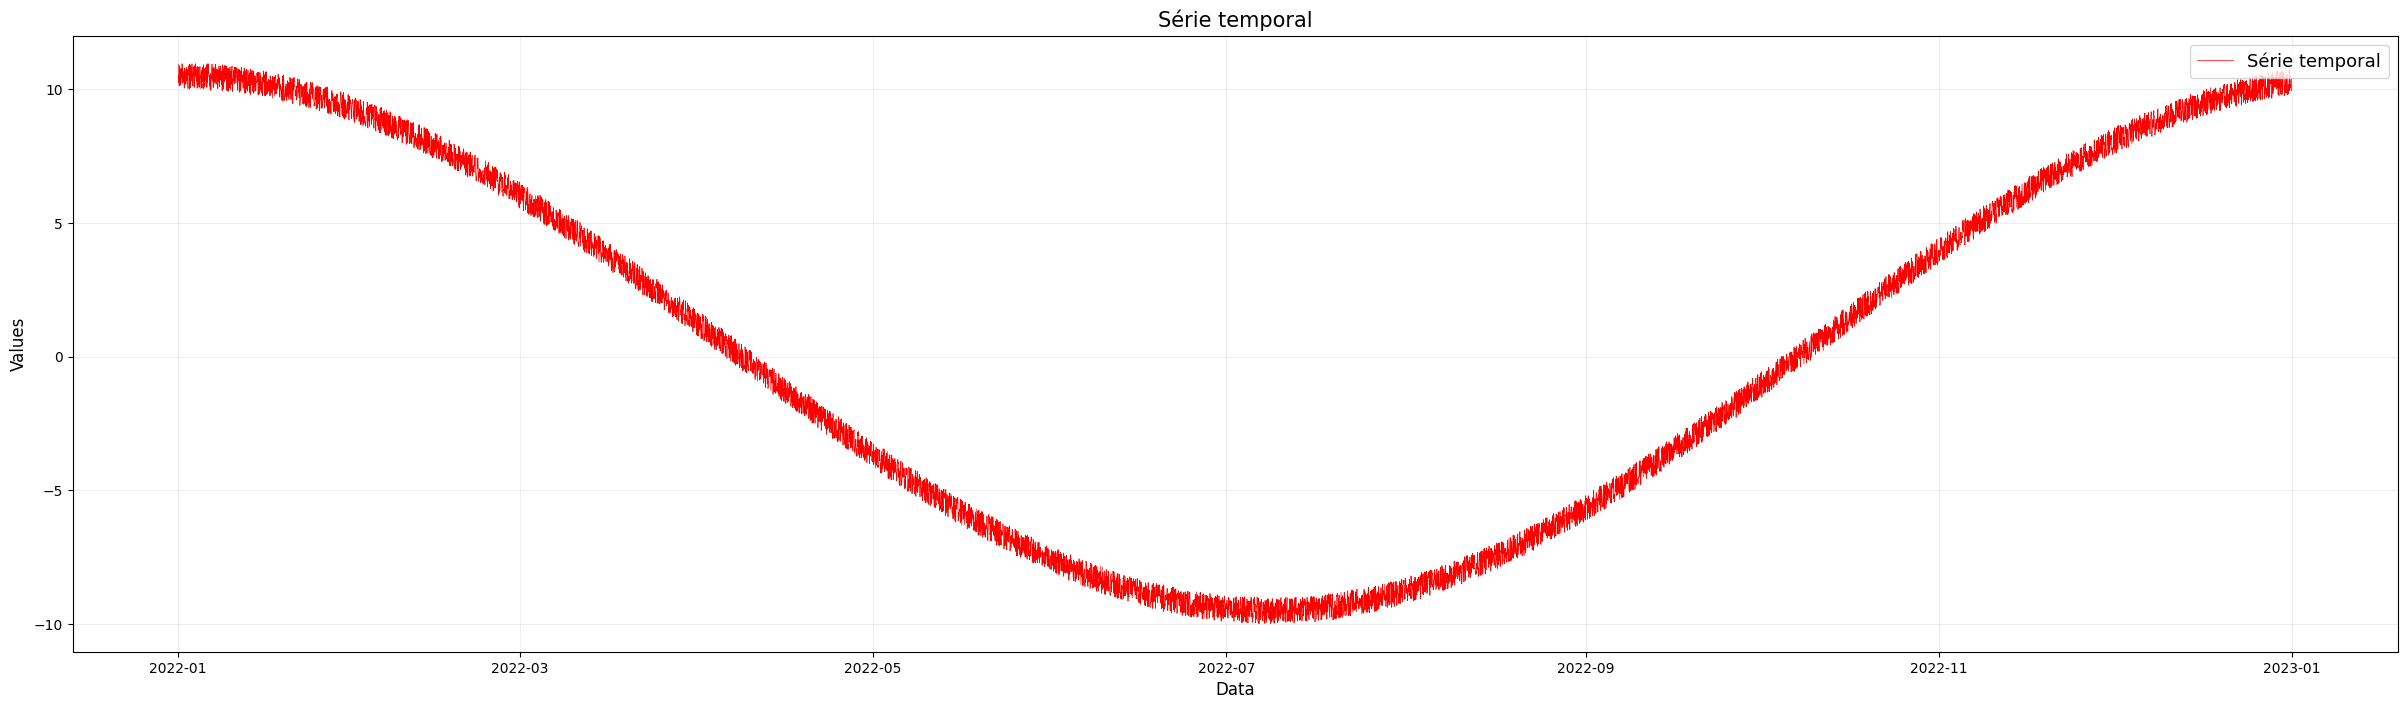

In [70]:
plt.figure(figsize=(30,8))
plt.plot(dataframe.index, dataframe['TS'], color='red',linewidth=0.5, label='Série temporal')
plt.title('Série temporal', fontsize=15)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.grid(alpha=0.2)
plt.legend(fontsize=13, loc=1)
plt.show()

<i>Criação de funções </i>

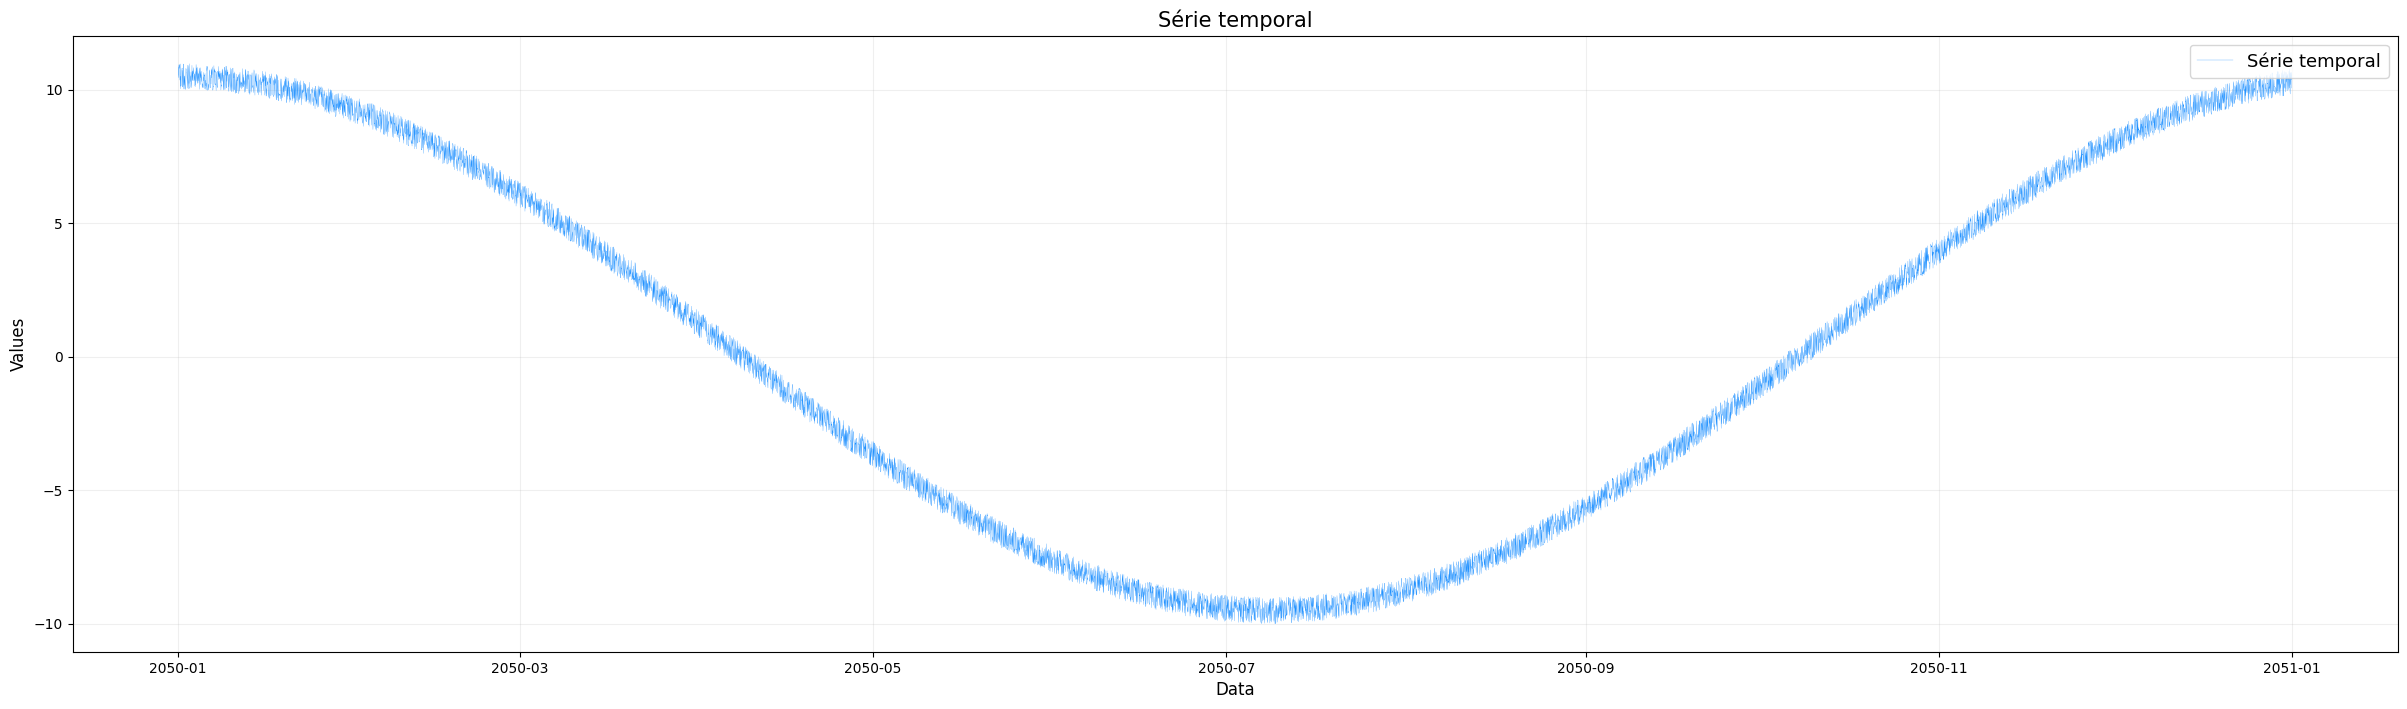

In [71]:
def noiseCreation(path, year):
    global dataframe
    dataframe = pandas.DataFrame()
    dtime = numpy.arange(numpy.datetime64(f'{str(year)}-01-01'),numpy.datetime64(f'{str(year+1)}-01-01'),numpy.timedelta64(1,'h'))
    dataframe['Datetime'] = dtime
    dataframe['Values'] = numpy.random.rand(dataframe.shape[0])
    dataframe = dataframe.set_index(dataframe['Datetime'])
    dataframe = dataframe[['Values']]
    dataframe['Ano'] = dataframe.index.year
    dataframe['Mês'] = dataframe.index.month
    dataframe['Dia'] = dataframe.index.day

    #Criação da sazonalidade
    tt = numpy.arange(0,dataframe.shape[0],1)
    dataframe['Sazonal'] = (numpy.cos(tt/(360*4)))
    dataframe['TS'] = 10*dataframe['Sazonal'] + dataframe['Values']
    dataframe.to_csv(fr'{path}/noise_{str(year)}.csv')
    return dataframe

def Figure(dataframe):
    plt.figure(figsize=(30,8))
    plt.plot(dataframe.index, dataframe['TS'], color='dodgerblue',linewidth=0.2, label='Série temporal',linestyle='-')
    plt.title('Série temporal', fontsize=15)
    plt.xlabel('Data', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.grid(alpha=0.2)
    plt.legend(fontsize=13, loc=1)
    plt.show()

path = 'c:/Users/Hydroinfo/Documents/Scripts/Modelling_air/Air-Modelling/excel/v1'
ts = noiseCreation(path,2050)
Figure(ts)

<i>Primeiro Laço de repetição </i>

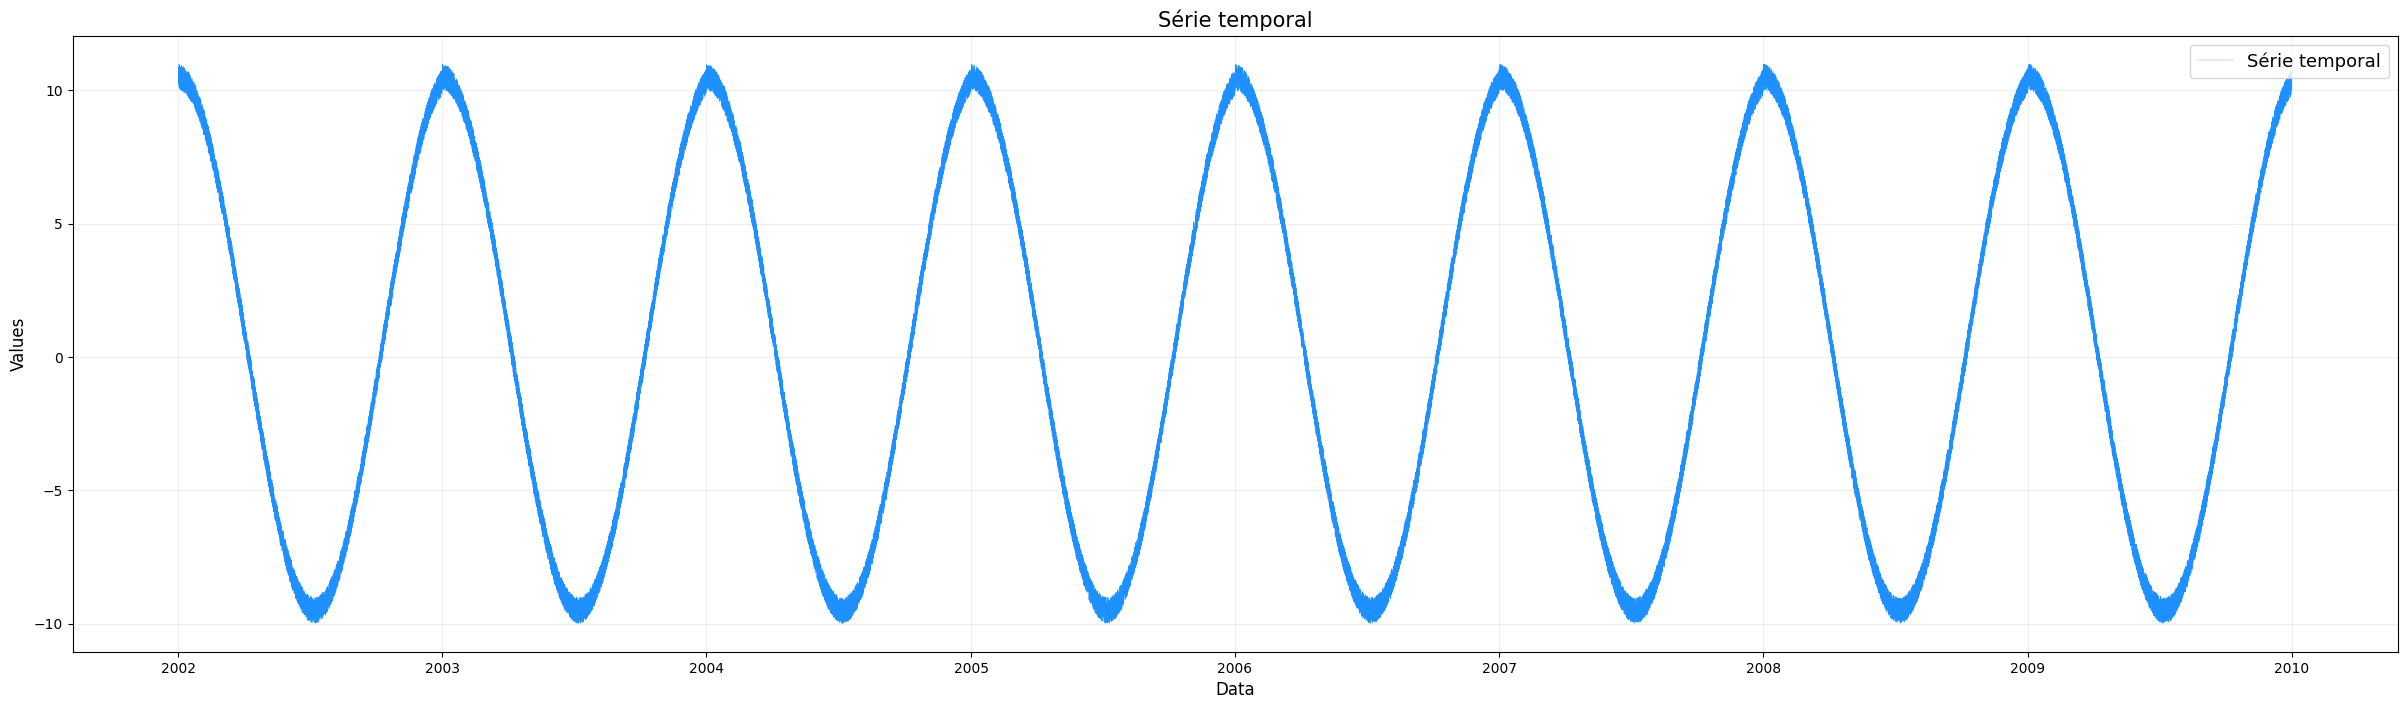

TS
Data                          
2002-01-01 00:00:00  10.509214
2002-01-01 01:00:00  10.439730
2002-01-01 02:00:00  10.600003
2002-01-01 03:00:00  10.867046
2002-01-01 04:00:00  10.282254
...                        ...
2009-12-31 19:00:00  10.557430
2009-12-31 20:00:00  10.228129
2009-12-31 21:00:00   9.850378
2009-12-31 22:00:00  10.205656
2009-12-31 23:00:00  10.322799

[70128 rows x 1 columns]

In [72]:
index = []
values = []
for j in range(2002,2010):
    path = 'c:/Users/Hydroinfo/Documents/Scripts/Modelling_air/Air-Modelling/excel/v1'
    index.extend(noiseCreation(path,j)['TS'].index)
    values.extend(noiseCreation(path,j)['TS'].values)
ts = pandas.DataFrame({'Data':index,'TS':values})
ts = ts.set_index(ts.Data)
ts = ts[['TS']]
Figure(ts)
ts

<i>Segundo Laço de repetição </i>

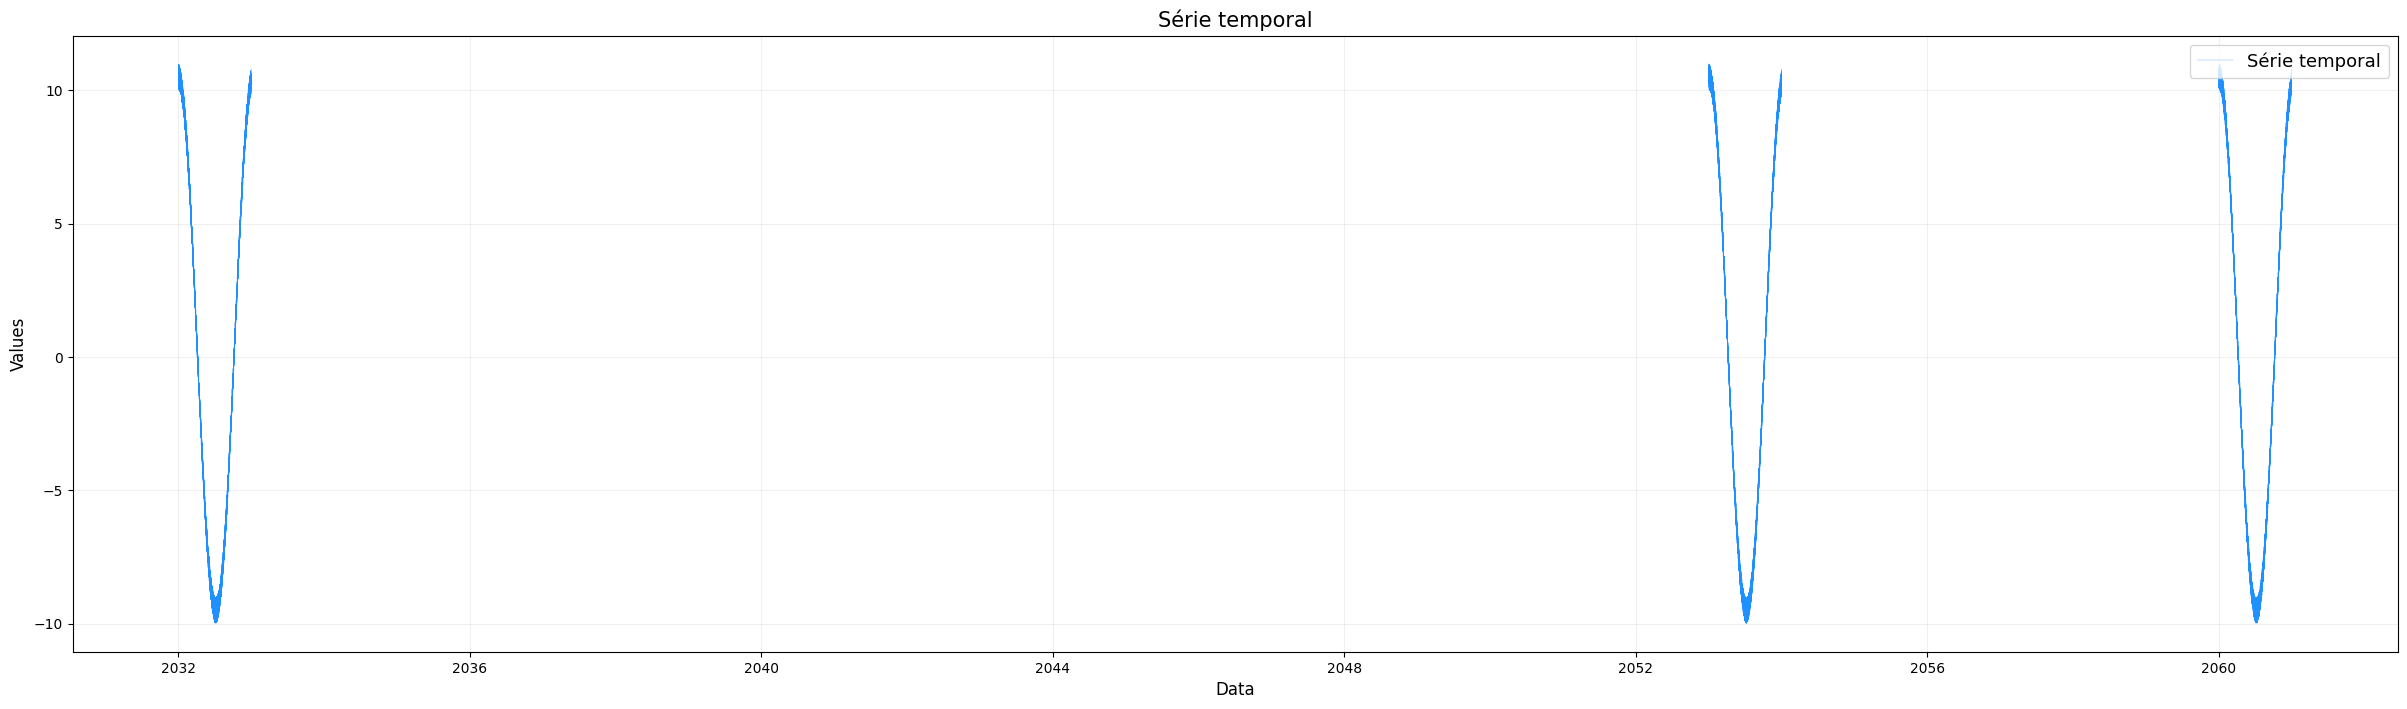

In [73]:
anos = [2001,2030,2032,2053,2060]
index = []
values = []
for ano in anos:
    if ano > 2030:
        path = 'c:/Users/Hydroinfo/Documents/Scripts/Modelling_air/Air-Modelling/excel/v2' 
        index.extend(noiseCreation(path,ano)['TS'].index)
        values.extend(noiseCreation(path,ano)['TS'].values)
ts = pandas.DataFrame({'Data':index,'TS':values})
ts = ts.set_index(ts.Data)
ts = ts[['TS']]
dates = pandas.date_range(ts.index.min(),ts.index.max(), freq='h')
dates = pandas.DataFrame({'Data': dates})
ts_final = pandas.merge(dates,ts,on='Data',how='left')
ts_final = ts_final.set_index(ts_final['Data'])
ts_final = ts_final[['TS']]
Figure(ts_final)

In [74]:
#Tratamento dos dados para concatenação
print(f'Números de dados vazios: {ts_final.isnull().sum().values}')
print(f'Tamanho: {len(ts_final)}')
ts_final = ts_final.dropna()
print(f'Números de dados vazios: {ts_final.isnull().sum().values}')
print(f'Tamanho: {len(ts_final)}')

Números de dados vazios: [227904]
Tamanho: 254232
Números de dados vazios: [0]
Tamanho: 26328


<i>Concatenação de arquivos </i>

In [76]:
path = 'c:/Users/Hydroinfo/Documents/Scripts/Modelling_air/Air-Modelling/excel/v2' 
files = os.listdir(path)
print(files)

allData = []
for file in files:
    if file.endswith('.csv'):
        print(files)
        data = pandas.read_csv(f'{path}/{file}')
        allData.append(data)

df_final = pandas.concat(allData)
df_final

['noise_2032.csv', 'noise_2053.csv', 'noise_2060.csv']
['noise_2032.csv', 'noise_2053.csv', 'noise_2060.csv']
['noise_2032.csv', 'noise_2053.csv', 'noise_2060.csv']
['noise_2032.csv', 'noise_2053.csv', 'noise_2060.csv']


Datetime    Values   Ano  Mês  Dia   Sazonal         TS
0     2032-01-01 00:00:00  0.037852  2032    1    1  1.000000  10.037852
1     2032-01-01 01:00:00  0.260968  2032    1    1  1.000000  10.260966
2     2032-01-01 02:00:00  0.529239  2032    1    1  0.999999  10.529230
3     2032-01-01 03:00:00  0.983226  2032    1    1  0.999998  10.983204
4     2032-01-01 04:00:00  0.775816  2032    1    1  0.999996  10.775778
...                   ...       ...   ...  ...  ...       ...        ...
8779  2060-12-31 19:00:00  0.082239  2060   12   31  0.982630   9.908539
8780  2060-12-31 20:00:00  0.941910  2060   12   31  0.982759  10.769497
8781  2060-12-31 21:00:00  0.054217  2060   12   31  0.982887   9.883085
8782  2060-12-31 22:00:00  0.050016  2060   12   31  0.983014   9.880161
8783  2060-12-31 23:00:00  0.867912  2060   12   31  0.983142  10.699329

[26328 rows x 7 columns]